<a href="https://colab.research.google.com/github/josooik/DeepLearning/blob/main/3_SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소프트맥스 회귀 ( Softmax Regression )

>**목차**
1. 개념정리
3. 원-핫 벡터
3. 실습


In [153]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---


<br>

###<center> < 가설 > </center>
###  <center>$f(x)=softmax(xW+b)$</center>

<br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \;J(y, \hat{y})$</center>
### <center> $ =arg \; min \;J(y, f(x))$</center>
### <center> $ =arg \; min \;J(y, softmax(xW+b))$</center>

### **소프트맥스 함수 ( Softmax funtion )**

<br>

### <center> $softmax(x)_k = \frac{1}{\sum_{j=1}^{d}e^{(x_j)}}e(x_k)$

<br>

### <center> $softmax(x) = [\frac{e(x_1)}{\sum_{j=1}^{d}e^{(x_j)}}, \frac{e(x_2)}{\sum_{j=1}^{d}e^{(x_j)}} ... \frac{e(x_d)}{\sum_{j=1}^{d}e^{(x_j)}}]$

* 구현

In [154]:
def softmax(x):
  y1 = np.array([np.exp(xi) for xi in x])
  y2 = y1 / np.sum(y1)
  return y2

softmax([1, 2, 3])

array([0.09003057, 0.24472847, 0.66524096])

* 예제
  * $ x_1 = (2,1,1)$
  * $ x_2 = (2,5,3)$
  * $ x_3 = (-1,2,5)$

In [155]:
x1 = np.array([2, 1, 1])
print("x1 : ", softmax(x1))

x2 = np.array([2, 5, 3])
print("x2 : ", softmax(x2))

x3 = np.array([-1, 2, 5])
print("x3 : ", softmax(x3))

x1 :  [0.57611688 0.21194156 0.21194156]
x2 :  [0.04201007 0.84379473 0.1141952 ]
x3 :  [0.00235563 0.04731416 0.95033021]


### **가설 구현**
###<center>$f(x)=softmax(xW+b)$</center>

In [156]:
def hypothesis(x, W, b=0):
  return softmax(np.dot(x, W) + b)

### **예제**

|X|
|------|
|-3|
|-2|
|-1|
|0|
|1|
|2|
|3|


* 데이터 정의



In [157]:
X = np.array([[-3],
             [-2],
             [-1],
             [0],
             [1],
             [2],
             [3]])

X.shape

(7, 1)

* 예측

In [158]:
W = np.array([[2, 3, 4]])
print(W, W.shape)

for x in X:
  y_pred = hypothesis(x, W)
  print(x, y_pred)

[[2 3 4]] (1, 3)
[-3] [0.95033021 0.04731416 0.00235563]
[-2] [0.86681333 0.11731043 0.01587624]
[-1] [0.66524096 0.24472847 0.09003057]
[0] [0.33333333 0.33333333 0.33333333]
[1] [0.09003057 0.24472847 0.66524096]
[2] [0.01587624 0.11731043 0.86681333]
[3] [0.00235563 0.04731416 0.95033021]


## 2. 원-핫 벡터 (Cross Entropy)
---

|X|Y|
|---|--|
|-3|패배|
|-2|패배|
|-1|패배|
|0|무승부|
|1|무승부|
|2|승리|
|3|승리|


In [159]:
from tensorflow.keras.utils import to_categorical

* 데이터 정의



In [160]:
Y = np.array([0, 0, 0, 1, 1, 2, 2, 2])

Y_onehot = to_categorical(Y, num_classes=3)

print(Y_onehot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]



## 3. 실습
---

### **데이터**
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|1.1|불합격|
|2|2|8|2.3|불합격|
|3|4|8|3.0|유예|
|4|3|7|4.4|유예|
|5|5|7.5|5.5|유예|
|6|6|7|6.1|유예|
|7|6|6|7.3|합격|
|8|7|7|8.4|합격|
|9|6|6.5|9.8|합격|

* 데이터 정의

In [161]:
X = np.array([[0,1,9,0],
            [1,1,8.5,1.1],
            [2,2,8,2.3],
            [3,4,8,3.0],
            [4,3,7,4.4],
            [5,5,7.5,5.5],
            [6,6,7,6.5],
            [7,6,6,7.3],
            [8,7,7,8.4],
            [9,6,6.5,9.8]])
'''
Y = np.array([[1,0,0],
              [1,0,0],
              [1,0,0],
              [0,1,0],
              [0,1,0],
              [0,1,0],
              [0,1,0],
              [0,0,1],
              [0,0,1],
              [0,0,1]])
'''

Y = np.array([0,0,0,1,1,1,1,2,2,2])
y_onehot = to_categorical(Y, num_classes=3)

print(y_onehot)

X.shape, Y.shape

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


((10, 4), (10,))

* 시각화 

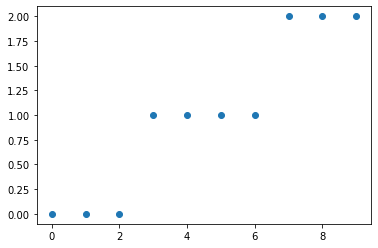

In [162]:
plt.plot(Y, marker='o', linestyle='')
plt.show()

###  **모델 생성**

* 케라스를 이용한 모델 구현

In [163]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [164]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W : ", W)
print("b : ", b)

W :  [[ 0.40137088 -0.14931422  0.1597526 ]
 [ 0.60296535 -0.7731091  -0.4011532 ]
 [ 0.519168    0.8214606  -0.68639773]
 [-0.22539854  0.0850203  -0.7297344 ]]
b :  [0. 0. 0.]


* 시각화

[[2.0676099e-01 7.9323751e-01 1.4697750e-06]
 [2.7206114e-01 7.2793728e-01 1.5935541e-06]
 [6.7287380e-01 3.2712504e-01 1.1312693e-06]
 [9.7826278e-01 2.1737145e-02 1.2180557e-07]
 [9.4527036e-01 5.4729234e-02 4.1576243e-07]
 [9.9652714e-01 3.4728532e-03 1.4519804e-08]
 [9.9940526e-01 5.9474265e-04 4.6232893e-09]
 [9.9967504e-01 3.2497759e-04 8.0999376e-09]
 [9.9990988e-01 9.0105794e-05 4.0092465e-10]
 [9.9972695e-01 2.7304349e-04 7.7495327e-10]]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


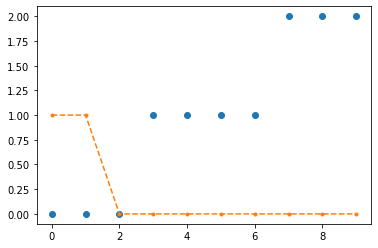

In [165]:
Y_pred_onehot = model.predict(X)
print(Y_pred_onehot)

y_pred = [np.argmax(y_pred_onehot) for y_pred_onehot in Y_pred_onehot]
print(y_pred)

plt.plot(Y, marker='o', linestyle='')
plt.plot(y_pred, marker='.', linestyle='--')

plt.show()

### **모델 학습**

* 모델 컴파일

In [166]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01),
              metrics=['acc'])

* 학습 진행

In [167]:
model.fit(X, y_onehot, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 277ms/step - loss: 8.4345 - acc: 0.1000
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 7.5792 - acc: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 6.7887 - acc: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 6.0726 - acc: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 5.4448 - acc: 0.1000
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 4.9187 - acc: 0.1000
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 4.4873 - acc: 0.2000
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 4.1139 - acc: 0.3000
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 3.7639 - acc: 0.3000
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 3.4224 - acc: 0.3000
Epoch 11/300
1/1 [==============================] - 0s 5ms/ste

### **결과**

* 학습 파라미터 확인

In [168]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W : ", W)
print("b : ", b)

W :  [[-0.38457888 -0.06909333  0.8654808 ]
 [-0.20056699 -0.3497114  -0.02101868]
 [ 0.831694    0.41457883 -0.59204215]
 [-1.0141256   0.1533159  -0.00930309]]
b :  [ 0.01187931 -0.04500439  0.03312505]


* 예측

In [169]:
Y_pred_onehot = model.predict(X)
print(Y_pred_onehot)

[[9.81291413e-01 1.87052526e-02 3.26674376e-06]
 [8.95782888e-01 1.04153074e-01 6.40621947e-05]
 [5.92195988e-01 4.06600147e-01 1.20382255e-03]
 [3.84309351e-01 6.07800245e-01 7.89037999e-03]
 [4.63041179e-02 9.06682730e-01 4.70130891e-02]
 [1.49419270e-02 8.72669876e-01 1.12388223e-01]
 [2.22743279e-03 6.08244300e-01 3.89528245e-01]
 [1.40651318e-04 2.03325763e-01 7.96533644e-01]
 [4.70180967e-05 1.91037431e-01 8.08915555e-01]
 [2.18178639e-06 8.90935883e-02 9.10904229e-01]]


* 시각화

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


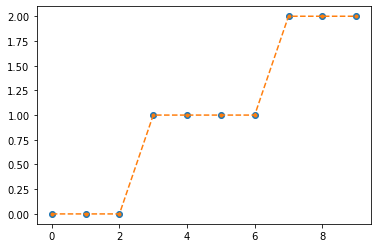

In [170]:
y_pred = [np.argmax(y_pred_onehot) for y_pred_onehot in Y_pred_onehot]
print(y_pred)

plt.plot(Y, marker='o', linestyle='')
plt.plot(y_pred, marker='.', linestyle='--')

plt.show()